In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd

In [2]:
nubb = pd.read_hdf("../data/Trackreco/0nubb_reco.h5")
display(nubb)

# Load the dictionary back from the pickle file (binary mode)
with open("../data/Trackreco/0nubb_trackreco.pkl", 'rb') as pickle_file:  # Use 'rb' for reading in binary
    Tracks_nubb      = pickle.load(pickle_file)
    connections_nubb = pickle.load(pickle_file)
    connection_counts_nubb = pickle.load(pickle_file)

Tl = pd.read_hdf("../data/Trackreco/Tl_reco.h5")
display(Tl)

# Load the dictionary back from the pickle file (binary mode)
with open("../data/Trackreco/Tl_trackreco.pkl", 'rb') as pickle_file:  # Use 'rb' for reading in binary
    Tracks_Tl      = pickle.load(pickle_file)
    connections_Tl = pickle.load(pickle_file)
    connection_counts_Tl = pickle.load(pickle_file)




,event_id,x,y,z,energy,id,primary,trkID,cumulative_distance,angle
0,50000,1733.399292,-2322.982178,5485.769043,0.004525,104,1,0,0.000000,0.000000
1,50000,1731.285156,-2323.723877,5480.418457,0.010175,100,1,0,5.800729,104.215896
2,50000,1729.772827,-2331.123291,5481.469727,0.025675,98,1,0,13.425926,86.032394
3,50000,1730.058228,-2330.812744,5488.967285,0.043550,99,1,0,20.935339,84.837395
4,50000,1724.745972,-2333.557129,5488.423828,0.034825,85,1,0,26.939259,98.215954
...,...,...,...,...,...,...,...,...,...,...
564,5326,1533.285156,5.777045,4754.432129,0.001725,441,0,5,128.926045,16.454296
565,5326,1537.437744,7.294185,4751.708496,0.022125,443,0,5,134.118721,16.117682
566,5326,1544.049438,6.005191,4743.725586,0.000825,446,0,5,144.563952,29.423508
567,5326,1545.112915,5.256940,4743.064453,0.000225,447,0,5,146.022704,29.408055


,event_id,x,y,z,energy,id,primary,trkID,cumulative_distance,angle
0,20000000,-1505.928833,620.689270,3022.554199,0.006425,0,1,14,0.000000,0.000000
1,20000000,-1504.859009,618.729919,3024.258789,0.000375,1,1,14,2.808773,107.835609
2,20000000,-1502.910522,615.964844,3026.877686,0.001125,2,1,14,7.086723,5.194976
3,20000000,-1499.540527,611.867126,3031.439697,0.008025,3,1,14,14.083873,4.422781
4,20000000,-1495.791870,608.043274,3035.715088,0.002500,4,1,14,20.936117,4.375965
...,...,...,...,...,...,...,...,...,...,...
500,2120041,-404.625610,1939.750366,558.160950,0.008125,306,0,7,19.915644,82.327209
501,2120041,-411.135498,1935.458740,561.272278,0.024500,302,0,7,28.310705,64.654055
502,2120041,-411.308380,1932.722412,563.036194,0.049675,301,0,7,31.570886,47.878343
503,2120041,-409.258331,1933.958862,565.210632,0.001300,304,0,7,34.805031,89.468672


In [12]:
print(len(nubb.event_id.unique()))
print(len(Tl.event_id.unique()))

26133
47673


{0: [2, 1], 2: [0, 8], 1: [4, 0], 4: [1, 6], 3: [5, 6], 5: [3, 13], 6: [3, 4], 7: [18, 9], 18: [7, 22], 8: [10, 2], 10: [8, 16], 9: [14, 7], 14: [9, 27], 16: [10, 24], 11: [19, 12], 19: [11, 29], 12: [17, 11], 17: [12, 25], 13: [23, 5], 23: [13, 31], 27: [14, 26], 24: [16, 34], 25: [17, 42], 22: [18, 30], 29: [19, 32], 20: [21, 15], 21: [20, 26], 30: [22, 37], 31: [23, 36], 26: [21, 27], 36: [31, 41], 32: [35, 29], 35: [32, 28], 33: [39, 44], 39: [33, 15], 34: [38, 24], 38: [34, 37], 37: [30, 38], 40: [41, 43], 41: [40, 36], 42: [44, 25], 44: [42, 33], 43: [45, 40], 45: [43, 46], 46: [45, 47], 47: [48, 46], 48: [47, 49], 49: [48, 50], 50: [51, 49], 51: [50, 52], 52: [53, 51], 53: [52, 54], 54: [55, 53], 55: [54, 56], 56: [55, 57], 57: [58, 56], 58: [57, 59], 59: [58, 61], 60: [66, 62], 66: [60, 69], 61: [67, 59], 67: [61, 70], 62: [63, 60], 63: [62, 64], 64: [63, 65], 65: [68, 64], 68: [65, 72], 69: [66, 71], 70: [67, 73], 73: [70, 75], 71: [69, 76], 72: [74, 68], 74: [72, 78], 75: [77

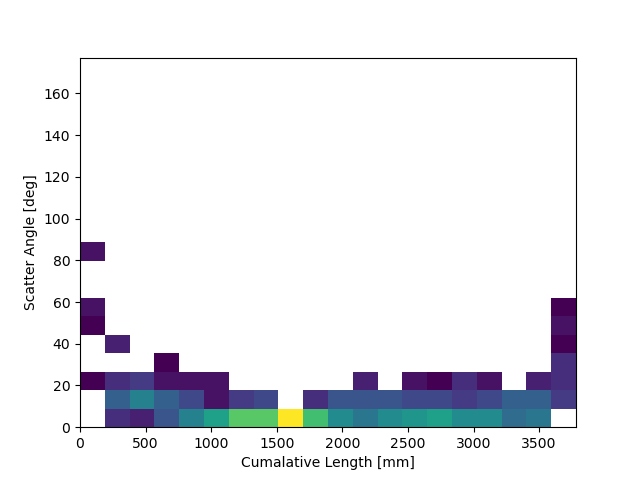

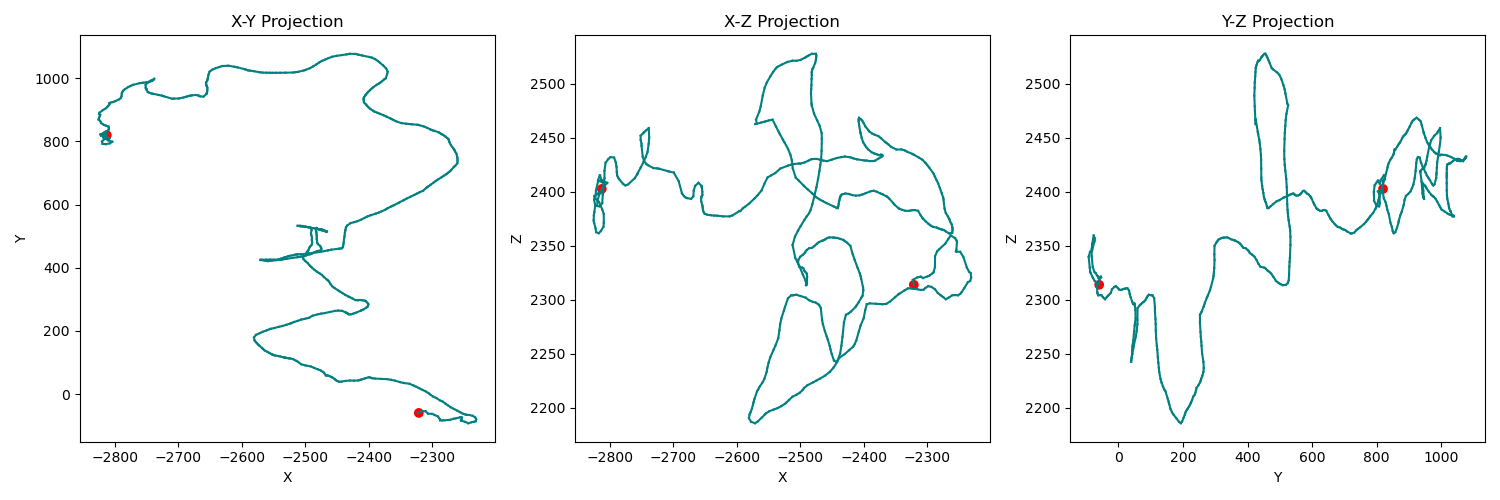

In [118]:
%matplotlib widget
# evid = 3900019
# evid = 13300017
# evid = 15780014
evid = 13300017

# evid = 50025

event = Tl[Tl.event_id == evid]
event.index = event.id
Track = Tracks_Tl[evid]
connection = connections_Tl[evid]
connection_count = connection_counts_Tl[evid]


# event = nubb[nubb.event_id == evid]
# event.index = event.id
# Track = Tracks_nubb[evid]
# connection = connections_nubb[evid]
# connection_count = connection_counts_nubb[evid]

print(connection)

plt.figure()

plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Scatter Angle [deg]")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

plt.tight_layout()

In [81]:
# Apply an event filter

def GetEnergyinRange(df, p_start, distance_threshold):
    # Get coordinates where id is 16
    start_coord = df[df['id'] == p_start][['x', 'y', 'z']].values

    # Calculate the Euclidean distance from each row to each row with id == 16
    distances = np.sqrt(((df[['x', 'y', 'z']].values[:, None] - start_coord) ** 2).sum(axis=2))

    # Find rows where any distance to id == 16 rows is less than the threshold
    mask = (distances < distance_threshold).any(axis=1)
    result = df[mask]
    return result.energy.sum()

def SortEnergy(blob1, blob2):

    if (blob1 > blob2):
        return blob1, blob2
    else:
        return blob2, blob1


def GetTrackProperties(df, Tracks_df):

    counter = 0
    properties_df = pd.DataFrame(columns=["event_id", "long_deltas", "brems", "blob1", "blob2"])

    for eid in df.event_id.unique():
        

        temp_df = df[df.event_id == eid]
        Tracks = Tracks_df[eid]

        Deltas = temp_df[temp_df.primary == 0]
        Deltas = Deltas.loc[Deltas.groupby(["event_id", "trkID"])["cumulative_distance"].idxmax()]
        long_deltas_flag = (Deltas["cumulative_distance"] > 10).any()

        # Check for any detached tracks from the primary
        primaryid = temp_df[temp_df.primary == 1]["trkID"].iloc[0]

        for t in Tracks:
            if t["id"] == primaryid:
                primary_nodes = t["nodes"]
                p_start = t["start"]
                p_end = t["end"]

        brem_flag = False
        for t in Tracks:
            if t["id"] != primaryid:
                found = any(item in primary_nodes for item in t["nodes"])
            
                # There was a detached track from primary had more than a certain amount of energy, so remove event
                if (not found and t["energy"] > 85e-3):
                    brem_flag = True


        # Now Get the energy of the primary end points
        start_energy = GetEnergyinRange(temp_df, p_start, 100)
        end_energy = GetEnergyinRange(temp_df, p_end, 100)

        blob1, blob2 = SortEnergy(start_energy, end_energy)


        # Create a new DataFrame to append
        new_data = pd.DataFrame({
            "event_id": [eid],
            "long_deltas": [long_deltas_flag],
            "brems": [brem_flag],
            "blob1" : [blob1],
            "blob2" : [blob2]
        })

        properties_df = pd.concat([properties_df, new_data], ignore_index=True)

        # if counter == 10:
        #     break

        counter = counter+1

    return properties_df




In [34]:
# Look at the number of unique tracks for an event

nubb_uTrk = nubb.groupby('event_id')['trkID'].nunique().reset_index()
Tl_uTrk = Tl.groupby('event_id')['trkID'].nunique().reset_index()

print(len(nubb_uTrk[nubb_uTrk.trkID == 1]))
print(len(Tl_uTrk[Tl_uTrk.trkID == 1]))

uTrk_nubb = nubb_uTrk[nubb_uTrk.trkID == 1].event_id.unique()
uTrk_Tl = Tl_uTrk[Tl_uTrk.trkID == 1].event_id.unique()

2410
2346


In [50]:
# Plot the number of angular scatters for background in the first 500 mm

def GetMinMaxCounts(df):
    df_blobs = df[df.primary == 1]
    df_blobs = df_blobs[df_blobs.cumulative_distance < 100]
    df_blobs = df_blobs[df_blobs.angle > 30]
    df_counts = df_blobs['event_id'].value_counts()
    df_counts = df_blobs['event_id'].value_counts().reset_index()
    df_counts.columns = ['event_id', 'count']

    df_blobs2 = df[df.primary == 1]

    max_cumulative_per_event = df_blobs2.groupby('event_id')['cumulative_distance'].transform('max')
    threshold_per_event = max_cumulative_per_event - 100
    df_blobs2 = df_blobs2[df_blobs2['cumulative_distance'] > threshold_per_event]
    df_blobs2 = df_blobs2[df_blobs2.angle > 30]
    df_counts2 = df_blobs2['event_id'].value_counts()
    df_counts2 = df_blobs2['event_id'].value_counts().reset_index()
    df_counts2.columns = ['event_id', 'count']

    df_merged = pd.merge(df_counts, df_counts2, on='event_id', how='inner')  # Inner join by default
    df_merged['max_count'] = df_merged[['count_x', 'count_y']].max(axis=1)
    df_merged['min_count'] = df_merged[['count_x', 'count_y']].min(axis=1)

    return df_merged

Tl_merged = GetMinMaxCounts(Tl)
nubb_merged = GetMinMaxCounts(nubb)

# Comment this out for the full sample
# nubb_merged = nubb_merged[nubb_merged.event_id.isin(uTrk_nubb)]
# Tl_merged = Tl_merged[Tl_merged.event_id.isin(uTrk_Tl)]

print(len(nubb.event_id.unique()), len(nubb_merged.event_id.unique()))
print(len(Tl.event_id.unique()), len(Tl_merged.event_id.unique()))

# nubb_merged = nubb_merged[nubb_merged.] 


display(Tl_merged)
display(nubb_merged)

26133 25811
47673 29129


,event_id,count_x,count_y,max_count,min_count
0,19360016,19,7,19,7
1,19920025,19,9,19,9
2,8820018,19,7,19,7
3,17000000,18,12,18,12
4,8440028,18,12,18,12
...,...,...,...,...,...
29124,13720045,1,5,5,1
29125,6840009,1,10,10,1
29126,13720042,1,11,11,1
29127,13720040,1,11,11,1


,event_id,count_x,count_y,max_count,min_count
0,38666,19,11,19,11
1,34822,19,8,19,8
2,29372,19,11,19,11
3,9356,18,11,18,11
4,38501,18,12,18,12
...,...,...,...,...,...
25806,21656,1,10,10,1
25807,30368,1,11,11,1
25808,27059,1,12,12,1
25809,40301,1,1,1,1


Text(0.5, 0, 'Num hits > 20 deg start/end')

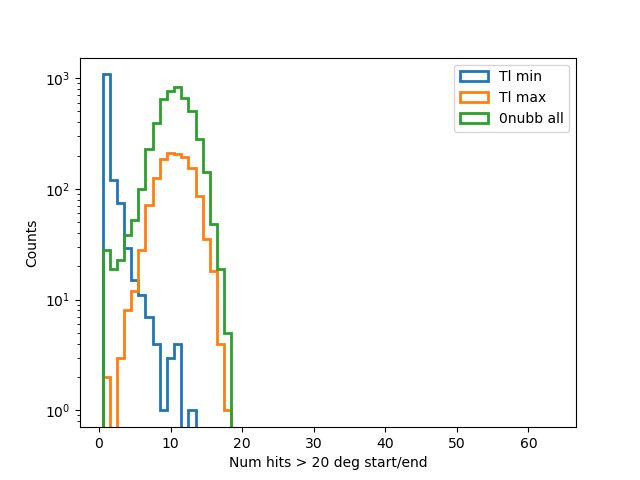

In [44]:
plt.figure()
# Step 1: Count the occurrences of each event_id


# Step 2: Plot histogram of the counts (excluding unique events)
plt.hist(Tl_merged["min_count"], bins=range(1, 65), align='left', histtype="step", linewidth = 2, label = "Tl min");
plt.hist(Tl_merged["max_count"], bins=range(1, 65), align='left', histtype="step", linewidth = 2, label = "Tl max");

combined_counts_nubb = np.concatenate([nubb_merged["max_count"], nubb_merged["min_count"]])
plt.hist(combined_counts_nubb, bins=range(1, 65), align='left', histtype="step", linewidth = 2, label = "0nubb all");

plt.semilogy()
plt.legend()

plt.ylabel("Counts")
plt.xlabel("Num hits > 20 deg start/end")

      event_id  count_x  count_y  max_count  min_count
1     19920025       19        9         19          9
3     17000000       18       12         18         12
4      8440028       18       12         18         12
5       160018       18       12         18         12
6      3420015       18        8         18          8
...        ...      ...      ...        ...        ...
6693   4140049        8       12         12          8
6694  15780030        8       15         15          8
6695   6000022        8       10         10          8
6699    940003        8       14         14          8
6701   2360045        8       11         11          8

[3025 rows x 5 columns]
26133 19002  Eff =  72.71266215130295
47673 3025  Eff =  6.345310762905628


Text(0.5, 0, 'Num hits > 20 deg start/end')

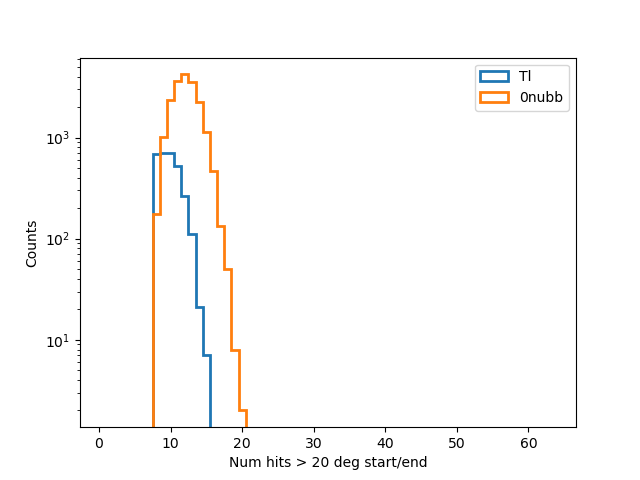

In [54]:
plt.figure()
# Step 1: Count the occurrences of each event_id

cutval = 7

Tl_cut = Tl_merged[ (Tl_merged.count_x >cutval) & (Tl_merged.count_y >cutval) ]
nubb_cut = nubb_merged[ (nubb_merged.count_x >cutval) & (nubb_merged.count_y >cutval) ]

print(Tl_cut)

print(len(nubb.event_id.unique()), len(nubb_cut.event_id.unique()), " Eff = ", 100 * len(nubb_cut.event_id.unique())/len(nubb.event_id.unique()))
print(len(Tl.event_id.unique()), len(Tl_cut.event_id.unique()), " Eff = ", 100 * len(Tl_cut.event_id.unique())/len(Tl.event_id.unique()))

# Step 2: Plot histogram of the counts (excluding unique events)
plt.hist(Tl_cut["min_count"], bins=range(1, 65), align='left', histtype="step", linewidth = 2, label = "Tl");
plt.hist(nubb_cut["max_count"], bins=range(1, 65), align='left', histtype="step", linewidth = 2, label = "0nubb");

plt.semilogy()
plt.legend()

plt.ylabel("Counts")
plt.xlabel("Num hits > 20 deg start/end")

In [96]:
Tl_cut_events = Tl_cut.event_id.unique()
Tl_properties = GetTrackProperties(Tl[Tl.event_id.isin(Tl_cut_events)], Tracks_Tl)

nubb_cut_events = nubb_cut.event_id.unique()
nubb_properties = GetTrackProperties(nubb[nubb.event_id.isin(nubb_cut_events)], Tracks_nubb)

display(Tl_properties)

,event_id,long_deltas,brems,blob1,blob2
0,20000007,True,True,0.444950,0.227575
1,20000012,True,False,0.494900,0.305225
2,20000014,True,True,0.294800,0.216625
3,20000026,True,False,0.450925,0.347225
4,20000031,True,True,0.535950,0.338400
...,...,...,...,...,...
3020,19980002,True,True,0.413875,0.380400
3021,3760018,True,True,0.592300,0.336275
3022,3760030,True,True,0.304525,0.128350
3023,2120002,True,True,0.470475,0.348825


26133 2090  Eff =  7.99755098917078
47673 11  Eff =  0.02307385731965683


,event_id,long_deltas,brems,blob1,blob2
746,2520027,False,False,0.343975,0.313975
867,8320037,False,False,0.341950,0.340025
1091,9500041,False,False,0.361100,0.317375
1245,10340038,False,False,0.411075,0.344275
1590,12180029,False,False,0.365750,0.329050
1634,12360022,False,False,0.390475,0.353675
1709,12760014,False,False,0.489175,0.313875
1808,13300017,False,False,0.379400,0.336750
2266,15780014,False,False,0.499575,0.427425
2646,17960011,False,False,0.447200,0.365950


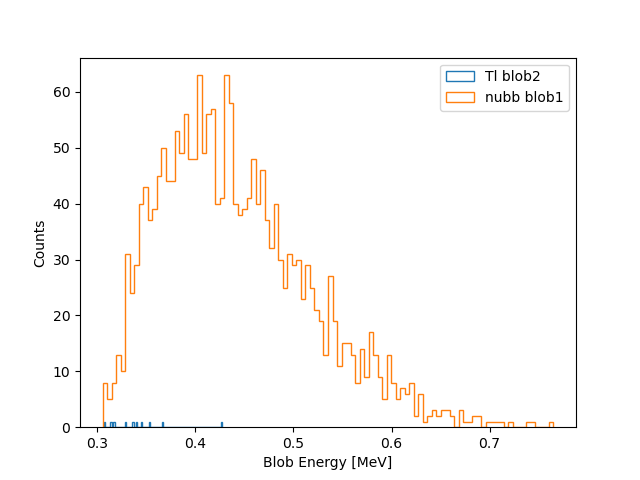

In [114]:
plt.figure()

Tl_properties_cut = Tl_properties[ Tl_properties.long_deltas == False ]
# Tl_properties_cut = Tl_properties_cut[ Tl_properties_cut.brems == True ]
Tl_properties_cut = Tl_properties_cut[Tl_properties_cut.blob2 > 0.3]

nubb_properties_cut = nubb_properties[ nubb_properties.long_deltas == False ]
# nubb_properties_cut = nubb_properties_cut[ nubb_properties_cut.brems == True ]
nubb_properties_cut = nubb_properties_cut[nubb_properties_cut.blob2 > 0.3]

# plt.hist(Tl_properties_cut.blob1, bins = 100, histtype="step", label = "Tl blob1")
plt.hist(Tl_properties_cut.blob2, bins = 100, histtype="step", label = "Tl blob2")

plt.hist(nubb_properties_cut.blob1, bins = 100, histtype="step", label = "nubb blob1")
# plt.hist(nubb_properties_cut.blob2, bins = 100, histtype="step", label = "nubb blob2")

plt.legend()
plt.xlabel("Blob Energy [MeV]")
plt.ylabel("Counts")

print(len(nubb.event_id.unique()), len(nubb_properties_cut.event_id.unique()), " Eff = ", 100 * len(nubb_properties_cut.event_id.unique())/len(nubb.event_id.unique()))
print(len(Tl.event_id.unique()), len(Tl_properties_cut.event_id.unique()), " Eff = ", 100 * len(Tl_properties_cut.event_id.unique())/len(Tl.event_id.unique()))

display(Tl_properties_cut)